<a href="https://colab.research.google.com/github/KurtKalwin/Handwritten-Number-recognition/blob/master/numberrecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [0]:
mnist = tf.keras.datasets.mnist #loading the dataset of prewritten numbers
(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1) #turning values between 0 to 1

#building the model

model = tf.keras.models.Sequential() #with single input
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train,epochs= 10)

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2661 - accuracy: 0.9225
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1095 - accuracy: 0.9665
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0751 - accuracy: 0.9764
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0546 - accuracy: 0.9833
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0410 - accuracy: 0.9872
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0343 - accuracy: 0.9885
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0264 - accuracy: 0.9910
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0201 - accuracy: 0.9931
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0174 - accuracy: 0.9942
Epoch 10/10
1875/

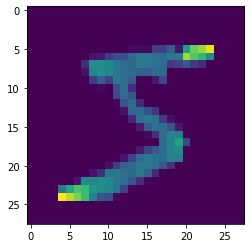

In [0]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
plt.show()





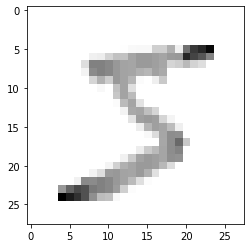

In [0]:


plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [0]:
val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_loss,val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1154 - accuracy: 0.9742
0.11538353562355042 0.9742000102996826


In [0]:
model.save('handwritten_number_reader.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: handwritten_number_reader.model/assets


In [0]:
new_model = tf.keras.models.load_model('handwritten_number_reader.model')

In [0]:
predictions = new_model.predict(x_test)
print(predictions)

[[5.3203136e-14 6.0579401e-13 1.4502359e-09 ... 1.0000000e+00
  8.6961137e-15 1.1897117e-13]
 [1.8432422e-16 8.2001304e-09 1.0000000e+00 ... 1.1717311e-14
  5.9751012e-16 2.5481315e-22]
 [5.0715332e-14 9.9999678e-01 3.7347831e-09 ... 1.0596059e-06
  2.2035654e-06 1.9123302e-10]
 ...
 [6.6009339e-14 8.1717584e-09 2.6821580e-11 ... 3.5001295e-07
  4.4592095e-12 4.4145885e-11]
 [1.6839232e-06 3.6559424e-08 5.7937831e-07 ... 5.2413598e-05
  9.5006937e-05 3.1800168e-12]
 [2.1434036e-13 7.7973652e-14 1.2816003e-12 ... 5.7012205e-16
  1.6889429e-12 9.2285415e-16]]


In [0]:
import numpy as np
print(np.argmax(predictions[7]))

9


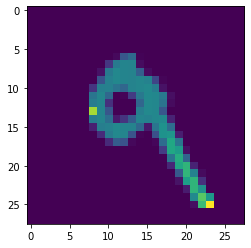

In [0]:
plt.imshow(x_test[7])
plt.show()

In [0]:
#using callback
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0
 
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
          tf.keras.layers.Dense(512, activation = tf.nn.relu),
          tf.keras.layers.Dense(10, activation = tf.nn.softmax)
     
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit( x_train, y_train, epochs=10,callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1998 - accuracy: 0.9410
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0815 - accuracy: 0.9753
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0534 - accuracy: 0.9833
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0380 - accuracy: 0.9884
Epoch 5/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0280 - accuracy: 0.9914
Reached 99% accuracy so cancelling training!
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0280 - accuracy: 0.9914
